In [1]:
from tree_registration_and_matching.example_data import simulate_tree_maps
from tree_registration_and_matching.eval import obj_mee_matching

from tree_registration_and_matching.register_MEE import align_plot
import matplotlib.pyplot as plt

import numpy as np

In [2]:
SHIFT = (5, -5)
N_TRIALS = 20
REGISTRATION_THRESH = 1.0

In [3]:
diffs = []

for _ in range(N_TRIALS):
    # Create a new simulated map. This will be random each iteration since no seed is provided.
    tree_maps = simulate_tree_maps(shift_x=SHIFT[0], shift_y=SHIFT[1])
    # Extract the three attributes from the returned dictionary
    pred = tree_maps["pred"]
    obs = tree_maps["obs"]
    obs_bounds = tree_maps["obs_bounds"]

    # Run the registration approach to compute the identified shift
    _, shift = align_plot(
        field_trees=obs, drone_trees=pred, obs_bounds=obs_bounds, vis=False
    )

    # Compute the difference between the real shift and the identified one, noting that the
    # convention is switched between the two quantities
    diff = np.array(shift) + np.array(SHIFT)
    diffs.append(diff)

Rough shift: (np.int64(-5), np.int64(6)), fine shift: (np.float64(-5.599999999999999), np.float64(5.400000000000001))
Rough shift: (np.int64(-5), np.int64(4)), fine shift: (np.float64(-4.999999999999998), np.float64(4.000000000000002))
Rough shift: (np.int64(-4), np.int64(5)), fine shift: (np.float64(-4.599999999999999), np.float64(5.400000000000002))
Rough shift: (np.int64(-5), np.int64(6)), fine shift: (np.float64(-4.1999999999999975), np.float64(5.800000000000002))
Rough shift: (np.int64(-4), np.int64(5)), fine shift: (np.float64(-3.799999999999998), np.float64(5.200000000000002))
Rough shift: (np.int64(-5), np.int64(5)), fine shift: (np.float64(-4.599999999999998), np.float64(4.000000000000001))
Rough shift: (np.int64(-5), np.int64(5)), fine shift: (np.float64(-5.199999999999998), np.float64(6.000000000000003))
Rough shift: (np.int64(-4), np.int64(5)), fine shift: (np.float64(-4.599999999999999), np.float64(5.400000000000002))
Rough shift: (np.int64(-4), np.int64(4)), fine shift: (

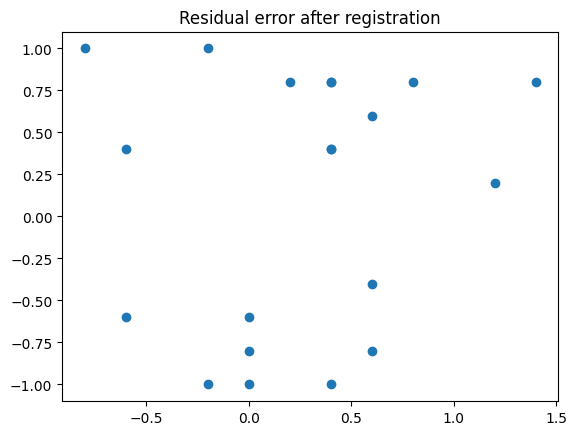

In [4]:
x, y = zip(*diffs)
plt.title("Residual error after registration")
plt.scatter(x, y)